In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Learning Objectives

Our focus in this session is to get to know a few libraries which are currently widely used in deep learning applications, pytorch. As an exercise, we will try to implement a model using the linear regression method in pytorch.

## Pytorch

PyTorch is an optimized Deep Learning tensor library based on Python and Torch and is mainly used for applications using GPUs and CPUs.



In [ ]:
import torch
import torch.nn as nn

## Tensors
[DOCUMENTATION LINKS](https://pytorch.org/docs/stable/tensors.html#torch.Tensor)

A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

### Creating a tensor
A tensor can be constructed from a Python list or sequence using the torch.tensor( ) constructor:

In [ ]:
x1 = torch.tensor([[1., -1.], [1., -1.]], dtype=torch.float32)
x2 = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]), dtype=torch.float32)

print(x1.shape, x2.shape)

x12 = torch.matmul(x1, x2)
print(x12)

# Creating a tensor of 1s
x10 = torch.ones((10,))
x_3_3 = torch.ones((10,))

# Creating a tensor of 0s
x5 = torch.zeros((10,))
x6 = torch.zeros((10,))

print(x10, x6)

torch.Size([2, 2]) torch.Size([2, 3])
tensor([[-3., -3., -3.],
        [-3., -3., -3.]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


# Exercise 1
1.  Calculate $[1, 2, 3] + [3, 4, 5]$ using pytorch

2. Create two matrices:

  a. $\begin{bmatrix} 1 & 2 & 3 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$

  b. $\begin{bmatrix} 3 & 2 & 1 \\ 3 & 3 & 3 \\ 1 & 2 & 4 \end{bmatrix}$

  and perform matrix multiplication:
  
  i. $a \times b$
  
  ii. $b \times a$

In [ ]:
## YOUR CODE GOES HERE

x11 + x12 = tensor([4, 6, 8])
a * b 
tensor([[12, 14, 19],
        [10,  8,  7],
        [10, 14, 22]])
b * a 
tensor([[ 9,  8, 15],
        [12, 12, 24],
        [ 7, 10, 21]])


# Linear Regression
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.


A linear regression line has an equation of the form $$Y = mX + c$$, where X is the explanatory variable and Y is the dependent variable. The slope of the line is m, and c is the intercept.

https://scikit-learn.org/stable/modules/linear_model.html

# Exercise 2
*   Create input(x_train) values between -2 and 2 evenly spaced 75 values using np.linespace command.
* Create `y_train` so that is generated by $y=2x+ 0.25 \times random$
* Hint: use np.random.randn for generating random_ value

In [ ]:
## YOUR CODE GOES HERE


Text(0.5, 1.0, 'Dataset Plot')

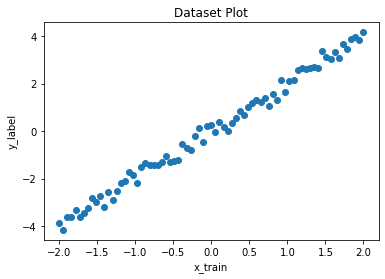

In [ ]:
## Run this section to plot graph
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_label')
plt.title('Dataset Plot')

In [ ]:
## Creating tensors from numpy to feed to model
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train)

## transforming (75,) to (75,1), making each value as distinct col 
## so it can be fed to the model at once 
x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

In [ ]:
class LinearRegressor(nn.Module):
  def __init__(self) -> None:
    super(LinearRegressor, self).__init__()
    self.linear_l1 = nn.Linear(1, 1)

  def forward(self, x):
    output = self.linear_l1(x)
    return output

In [ ]:
model = LinearRegressor()
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

In [ ]:
epochs = 100
ep = []
loss_arr = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = loss_fn(outputs, y_train.float())
    loss.backward()
    optimizer.step()
    ep.append(epoch)
    loss_arr.append(loss.item())
    if epoch % 10 == 0:
      print(f'epoch: {epoch}, loss : {loss.item()}')

epoch: 0, loss : 11.92999267578125
epoch: 10, loss : 0.6844794750213623
epoch: 20, loss : 0.0848490297794342
epoch: 30, loss : 0.05230917036533356
epoch: 40, loss : 0.05047542601823807
epoch: 50, loss : 0.05036409571766853
epoch: 60, loss : 0.050356425344944
epoch: 70, loss : 0.05035579949617386
epoch: 80, loss : 0.050355732440948486
epoch: 90, loss : 0.05035572871565819


In [ ]:
m, c = [a.item() for a in model.parameters()]


# Exercise 3

* Create testing Data same way the training dataset was created. But this time spaced from 2.5 to 4 we take out 25 datapoints.

* Change the shape of data from (25,) to (25,1)

* Use the freshly trained model to predict `y` from the test examples

In [ ]:
# YOUR CODE GOES HERE


(25,)


In [ ]:
def plot_results(x_train, y_train, x_test, y_pred, slope, intercept):
  fig, ax = plt.subplots(figsize=(6,6))

  ax.scatter(x_train.detach().numpy(), y_train, label='training')
  ax.scatter(x_test.detach().numpy(), y_pred.detach().numpy(), color='green', label='test')
  ax.set_xlabel('train X')
  ax.set_ylabel('train Y')
  x_vals = np.array(ax.get_xlim())
  y_vals = slope * x_vals + intercept
  ax.plot(x_vals, y_vals, '--', color='black', label='Fitted Line')
  ax.legend()
  fig.show()

# Exercise 4
Use the results, along with datasets and the `plot_results` functions to plot the data, results and learnt parameters.

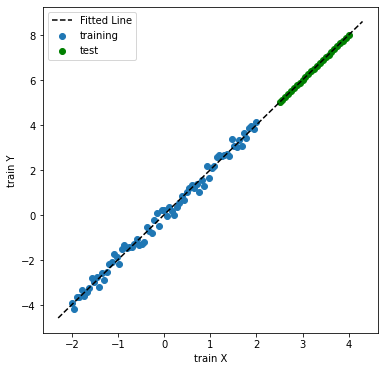

In [ ]:
## YOUR CODE GOES HERE
